In [1]:
# -*- coding: utf-8 -*-
#
# Código de ejemplo de regresión lineal con mínimos cuadrados
#
# Curso de aprendizaje automatizado
# PCIC, UNAM
#
# Gibran Fuentes-Pineda
# Septiembre 2016
#
import numpy as np
import matplotlib.pyplot as plt


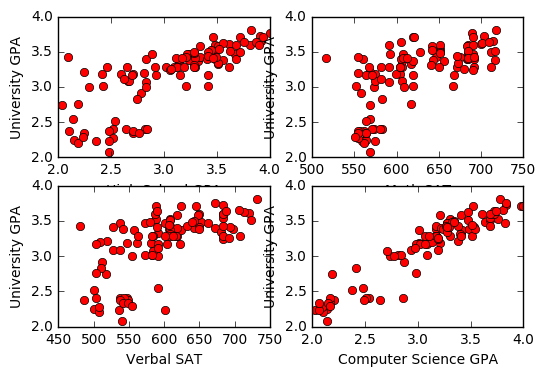

In [2]:
# carga los datos (fuente: http://onlinestatbook.com/2/case_studies/sat.html)
#
# Tarea de regresión: predecir University GPA a partir de otras calificaciones
# Atributos: High school GPA, Math SAT score, Verbal SAT score, Computer Science GPA
# Salida: University GPA
data = np.loadtxt("sat_gpa.csv")

# Asigna cada atributo a un a variable
hs_gpa = data[:,0]
math_sat = data[:,1]
verbal_sat = data[:,2]
comp_gpa = data[:,3]
univ_gpa = data[:,4]

# grafica salida con respecto a cada atributo
# y visualmente identifica qué atributo es mejor para

# plot High School GPA vs University GPA
plt.subplot(2, 2, 1)
plt.plot(hs_gpa, univ_gpa, 'ro')
plt.xlabel('High School GPA')
plt.ylabel('University GPA')

# plot Math SAT vs University GPA
plt.subplot(2, 2, 2)
plt.plot(math_sat, univ_gpa, 'ro')
plt.xlabel('Math SAT')
plt.ylabel('University GPA')

# plot Verbal SAT vs University GPA
plt.subplot(2, 2, 3)
plt.plot(verbal_sat, univ_gpa, 'ro')
plt.xlabel('Verbal SAT')
plt.ylabel('University GPA')

# plot Computer Science GPA vs University GPA
plt.subplot(2, 2, 4)
plt.plot(comp_gpa, univ_gpa, 'ro')
plt.xlabel('Computer Science GPA')
plt.ylabel('University GPA')

plt.show()


[ 2.49  3.17  3.28  3.41  3.48  2.07  2.14  3.42  3.17  3.28  3.27  3.29
  2.98  3.22  3.07  3.71  2.94  3.17  3.38  3.52  3.68  3.84  3.28  3.17
  2.17  3.07  3.72  3.83  3.76  3.19  2.38  2.17  3.19  3.21  3.41  2.86
  2.19  3.3   2.17  2.14  2.42  3.11  2.48  3.52  2.15  2.98  3.51  3.51
  3.48  3.49  3.98  3.07  3.31  3.28  3.72  3.17  3.28  3.78  2.64  3.38
  2.54  3.81  3.32  3.02  3.68  2.84  3.17  3.53  3.31  3.01  3.72  3.19
  3.09  2.03  2.71  3.14  3.51  2.21  3.74  3.28  2.07  4.    3.21  3.34]


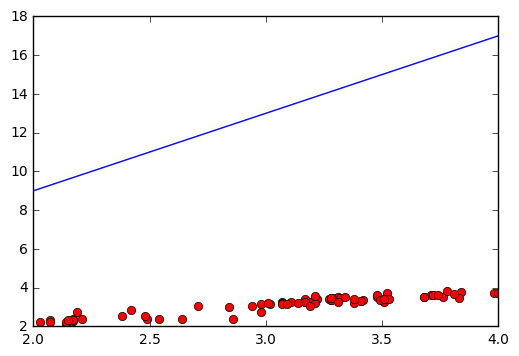

In [5]:

# usa sólo el atributo Computer Science GPA como regresor (sólo para el ejemplo)
# divide aleatoriamente la base de datos en entrenamiento (80%) y validación (20%)
permutation = np.random.permutation(comp_gpa.size)
train_set = permutation[:int(comp_gpa.size * 0.8)]
valid_set = permutation[int(comp_gpa.size * 0.8):]

# asigna valores de Computer Science GPA como atributo para las entradas
X_train = comp_gpa[train_set]
X_valid = comp_gpa[valid_set]
# asigna valores de University GPA como salida deseada
y_train = univ_gpa[train_set]
y_valid = univ_gpa[valid_set]


print X_train
# datos en rango de valores de entrada para graficar modelo
X_range = np.linspace(2.0, 4.0, 10000)
X_range = X_range[:,np.newaxis]

# Suponemos modelo de salida lineal con sólo un atributo
# elige un par de pesos arbitrariamente
theta0 = 1
theta1 = 4
# calcula salida del modelo con los pesos elegidos
y_train_hat = theta0 + theta1 * X_train

# inspecciona la suma de los cuadrados del error (SSE)
# entre las salidas del modelo y las deseadas
sse_train = (np.square(y_train - y_train_hat).sum())

# ahora inspecciona los datos de validación
y_valid_hat = theta0 + theta1 * X_valid
sse_valid = (np.square(y_valid - y_valid_hat).sum())

# calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train = sse_train / train_set.size
mse_valid = sse_valid / valid_set.size

# calcula salida para rango de valores de entrada
y_range = theta0 + theta1 * X_range

# grafica salidas del modelo y deseadas para ver ajuste
plt.plot(X_train, y_train, 'ro')
plt.plot(X_range, y_range, 'b')
plt.show()


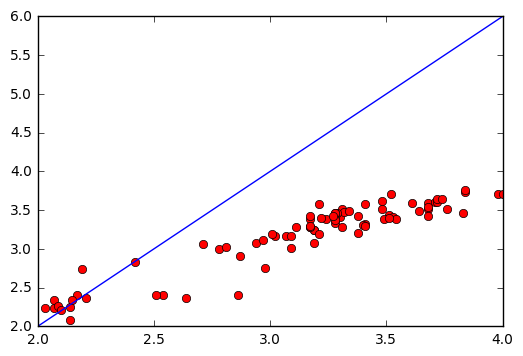

In [4]:
theta0 = -2
theta1 = 2
y_train_hat = theta0 + theta1 * X_train
# ¿qué error es mayor?
sse_train = (np.square(y_train - y_train_hat).sum())

# ahora inspecciona los datos de validación
y_valid_hat = theta0 + theta1 * X_valid
sse_valid = (np.square(y_valid - y_valid_hat).sum())

# calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train = sse_train / train_set.size
mse_valid = sse_valid / valid_set.size

# calcula salida para rango de valores de entrada
y_range = theta0 + theta1 * X_range

# grafica salidas del modelo y deseadas para ver ajuste
plt.plot(X_train, y_train, 'ro')
plt.plot(X_range, y_range, 'b')
plt.show()


In [7]:
# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
ones = np.ones((X_train.shape[0],1))
X_train_ones = np.concatenate((ones, X_train[:,np.newaxis]), axis=1)

print X_train_ones

[[ 1.    2.49]
 [ 1.    3.17]
 [ 1.    3.28]
 [ 1.    3.41]
 [ 1.    3.48]
 [ 1.    2.07]
 [ 1.    2.14]
 [ 1.    3.42]
 [ 1.    3.17]
 [ 1.    3.28]
 [ 1.    3.27]
 [ 1.    3.29]
 [ 1.    2.98]
 [ 1.    3.22]
 [ 1.    3.07]
 [ 1.    3.71]
 [ 1.    2.94]
 [ 1.    3.17]
 [ 1.    3.38]
 [ 1.    3.52]
 [ 1.    3.68]
 [ 1.    3.84]
 [ 1.    3.28]
 [ 1.    3.17]
 [ 1.    2.17]
 [ 1.    3.07]
 [ 1.    3.72]
 [ 1.    3.83]
 [ 1.    3.76]
 [ 1.    3.19]
 [ 1.    2.38]
 [ 1.    2.17]
 [ 1.    3.19]
 [ 1.    3.21]
 [ 1.    3.41]
 [ 1.    2.86]
 [ 1.    2.19]
 [ 1.    3.3 ]
 [ 1.    2.17]
 [ 1.    2.14]
 [ 1.    2.42]
 [ 1.    3.11]
 [ 1.    2.48]
 [ 1.    3.52]
 [ 1.    2.15]
 [ 1.    2.98]
 [ 1.    3.51]
 [ 1.    3.51]
 [ 1.    3.48]
 [ 1.    3.49]
 [ 1.    3.98]
 [ 1.    3.07]
 [ 1.    3.31]
 [ 1.    3.28]
 [ 1.    3.72]
 [ 1.    3.17]
 [ 1.    3.28]
 [ 1.    3.78]
 [ 1.    2.64]
 [ 1.    3.38]
 [ 1.    2.54]
 [ 1.    3.81]
 [ 1.    3.32]
 [ 1.    3.02]
 [ 1.    3.68]
 [ 1.    2.84]
 [ 1.    3